<a href="https://colab.research.google.com/github/Ruthuja-Gaikwad/AIML_2024/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/medical_insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
column_names = list(df.columns)

# Print each column name
for column in column_names:
    print(column)

age
sex
bmi
children
smoker
region
charges


In [3]:
target=df['charges']
df['sex'].replace({'male': 0, 'female': 1}, inplace=True)
df['smoker'].replace({'no': 0, 'yes': 1}, inplace=True)
df['region'].replace({'southeast': 0, 'southwest':1,'northeast':2,'northwest':3}, inplace=True)
features=df.drop(columns=['charges'],axis=1)

In [4]:
print(df)

      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       1       1  16884.92400
1      18    0  33.770         1       0       0   1725.55230
2      28    0  33.000         3       0       0   4449.46200
3      33    0  22.705         0       0       3  21984.47061
4      32    0  28.880         0       0       3   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
2767   47    1  45.320         1       0       0   8569.86180
2768   21    1  34.600         0       0       1   2020.17700
2769   19    0  26.030         1       1       3  16450.89470
2770   23    0  18.715         0       0       3  21595.38229
2771   54    0  31.600         0       0       1   9850.43200

[2772 rows x 7 columns]


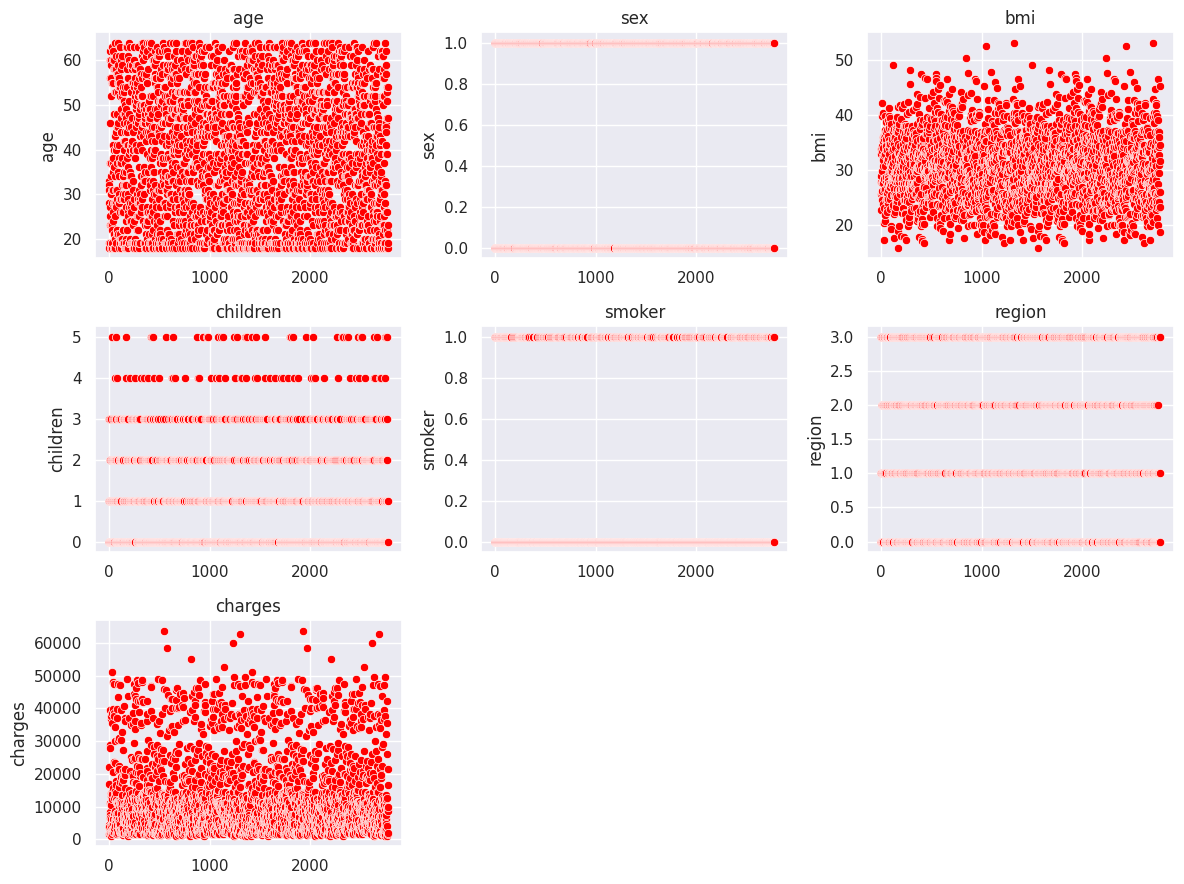

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
2767   47    1  45.320         1       0       0
2768   21    1  34.600         0       0       1
2769   19    0  26.030         1       1       3
2770   23    0  18.715         0       0       3
2771   54    0  31.600         0       0       1

[2772 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2772, dtype: float64
[[0.02173913 1.         0.3212268  0.         1.         0.33333333]
 [0.         0.         0.47914985 0.2        0.      

In [5]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=20)
sns.set()
df.head()
df.describe()
num_cols = len(df.columns)
num_rows = (num_cols + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(12, 3 * num_rows))
axes = axes.flatten()
for i, column in enumerate(df.columns):
    ax = axes[i]
    sns.scatterplot(df[column], ax=ax, color = "red")
    ax.set_title(column)

for i in range(num_cols, num_rows * 3):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
x=df.drop(columns='charges',axis=1)
y=df['charges']
print(x)
print(y)
scalar=MinMaxScaler()#normalized
scalar.fit(x)
x_scaled=scalar.transform(x)
print(x_scaled)
features=x_scaled
target=df['charges']
print(features)
print(target)


In [6]:
print("X.SHAPE=",x.shape)
print("X_TEST.SHAPE=",x_test.shape)
print("X_TRAIN.SHAPE=",x_train.shape)
print("Y_TEST.SHAPE=",y_test.shape)
print("Y_TRAIN.SHAPE=",y_train.shape)

X.SHAPE= (2772, 6)
X_TEST.SHAPE= (278, 6)
X_TRAIN.SHAPE= (2494, 6)
Y_TEST.SHAPE= (278,)
Y_TRAIN.SHAPE= (2494,)


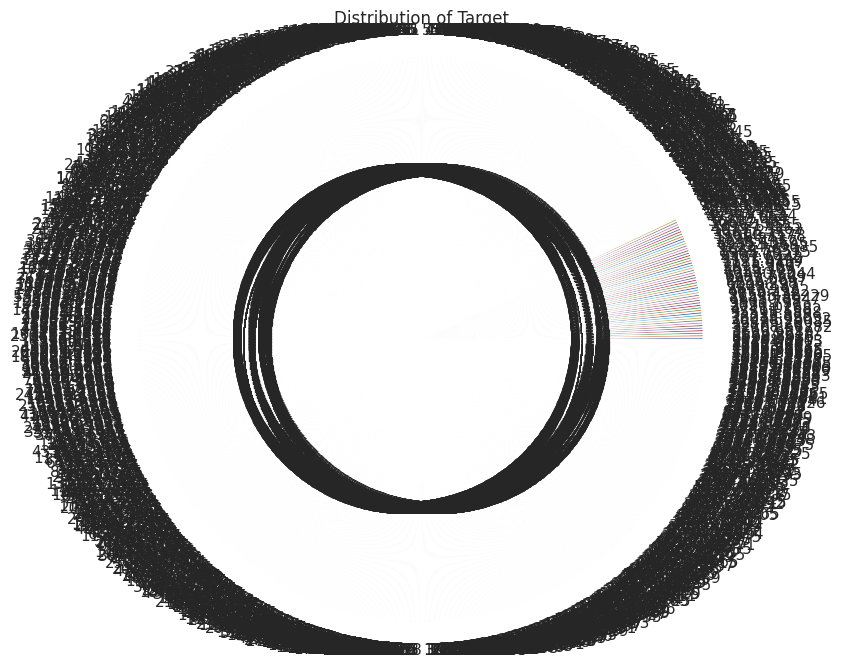

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/medical_insurance.csv')

# Create a pie chart
plt.figure(figsize=(8, 8))
data['charges'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Target')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.show()  # Display the pie chart

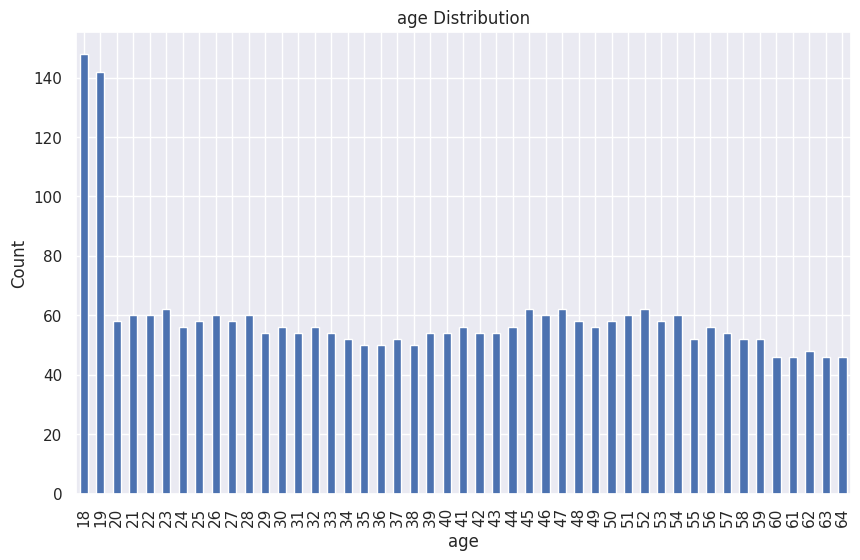

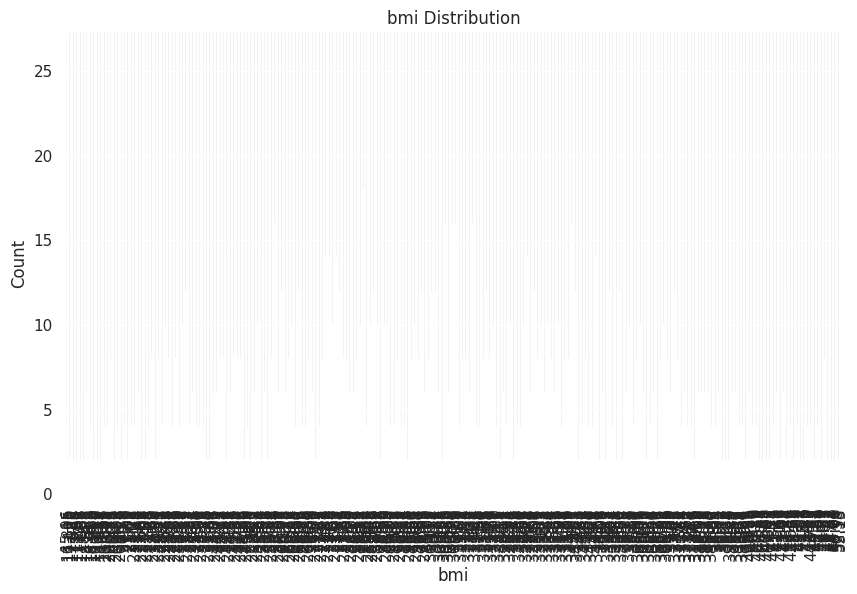

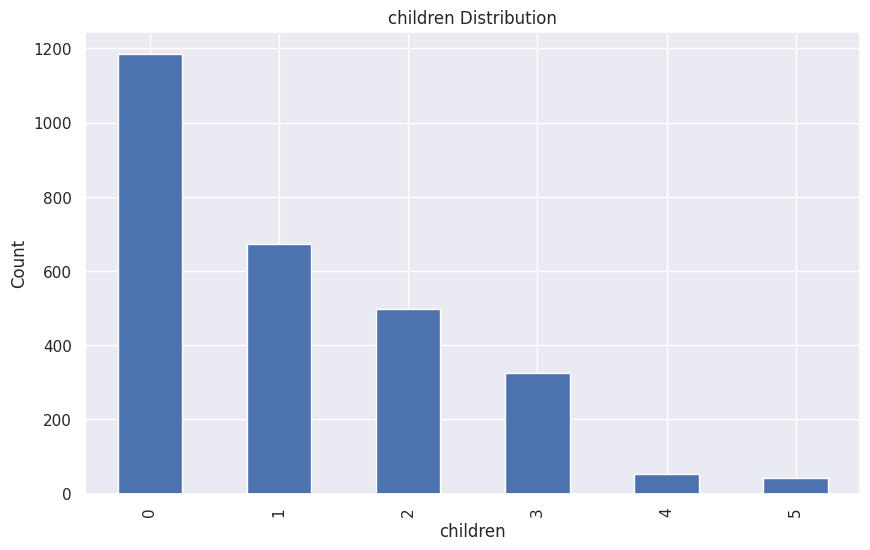

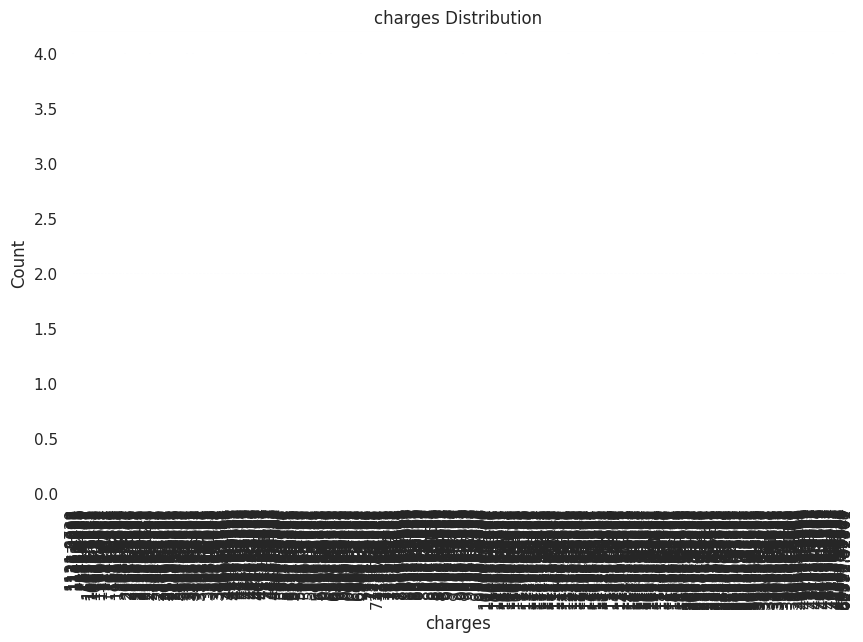

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
# Loop through the columns and create a bar graph for each
for column in data.columns:
    # Skip non-numeric columns to avoid errors
    if data[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(10, 6))
        data[column].value_counts().sort_index().plot(kind='bar')
        plt.title(f'{column} Distribution')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()

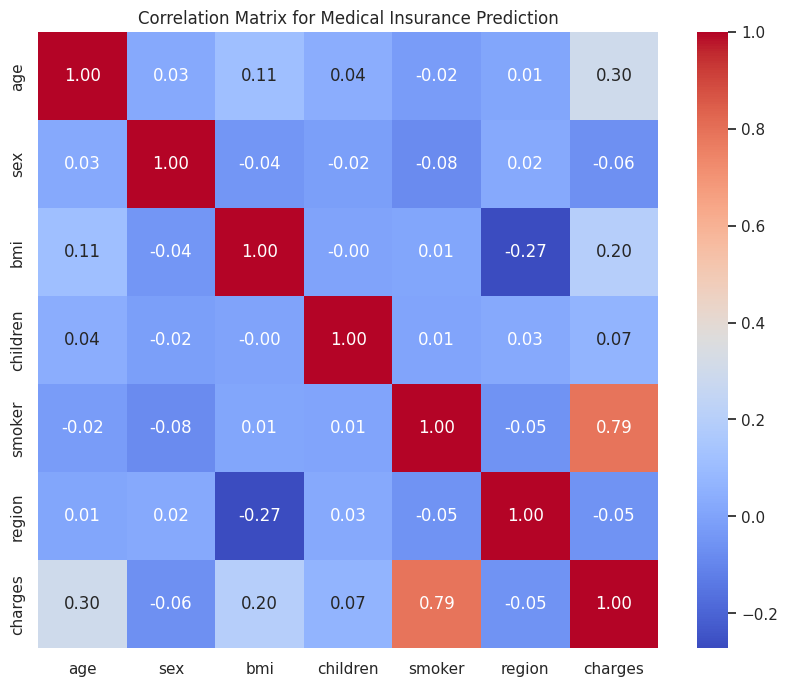

In [11]:
# Replace "features" with "df" in the following line:
correlation_matrix = df.corr()

# Restate the code with the correction:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Medical Insurance Prediction')
plt.show()

Mean Squared Error: 39969741.01


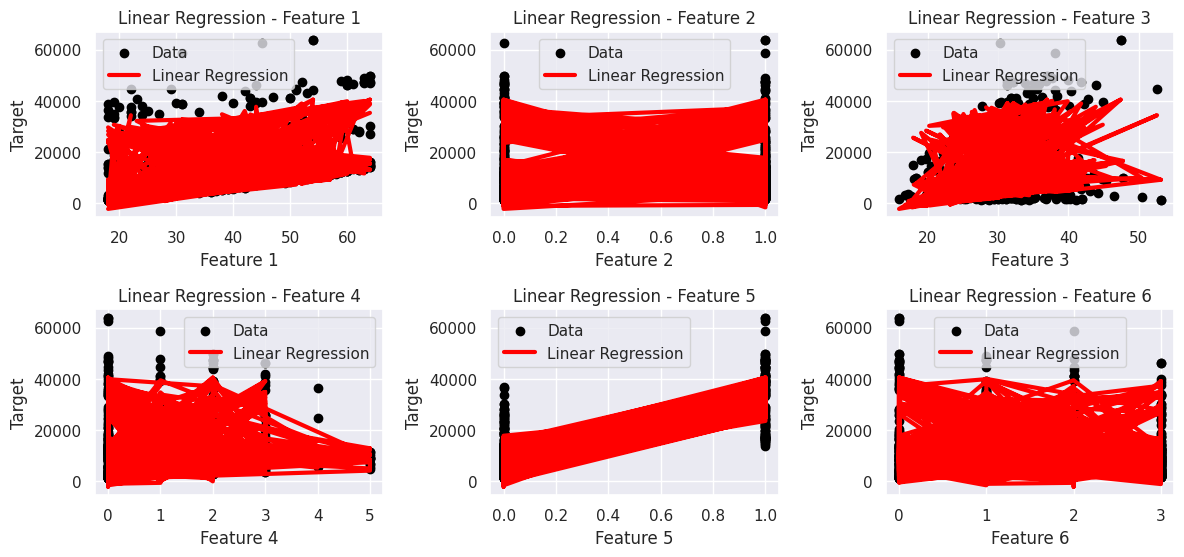

Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       252
           1       0.88      0.83      0.85       303

    accuracy                           0.85       555
   macro avg       0.84      0.85      0.84       555
weighted avg       0.85      0.85      0.85       555

[[216  36]
 [ 50 253]]


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
# Assuming df is your DataFrame containing the data

X = df.drop(columns='charges', axis=1)
y = df['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

num_features = X_test.shape[1]
plt.figure(figsize=(12, 8))
for i in range(num_features):
    plt.subplot(3, 3, i + 1)  # Adjust the subplot layout as needed
    plt.scatter(X_test.iloc[:, i], y_test, color='black', label='Data')
    plt.plot(X_test.iloc[:, i], y_pred, color='red', linewidth=3, label='Linear Regression')
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Target')
    plt.title(f'Linear Regression - Feature {i+1}')
    plt.legend()
plt.tight_layout()
plt.show()

# Define threshold for pseudo-accuracy calculation
threshold = 10000  # Define your threshold value

# Calculate pseudo-accuracy
accuracy = np.mean(np.abs(y_pred - y_test) <= threshold)
print(f'Accuracy: {accuracy:.2f}')
threshold = 10000
y_classified = np.where(y_pred <= threshold, 1, 0)
y_test_classified = np.where(y_test <= threshold, 1, 0)

# Print classification report and confusion matrix
print(classification_report(y_test_classified, y_classified))
print(confusion_matrix(y_test_classified, y_classified))


Mean Squared Error: 160729354.04


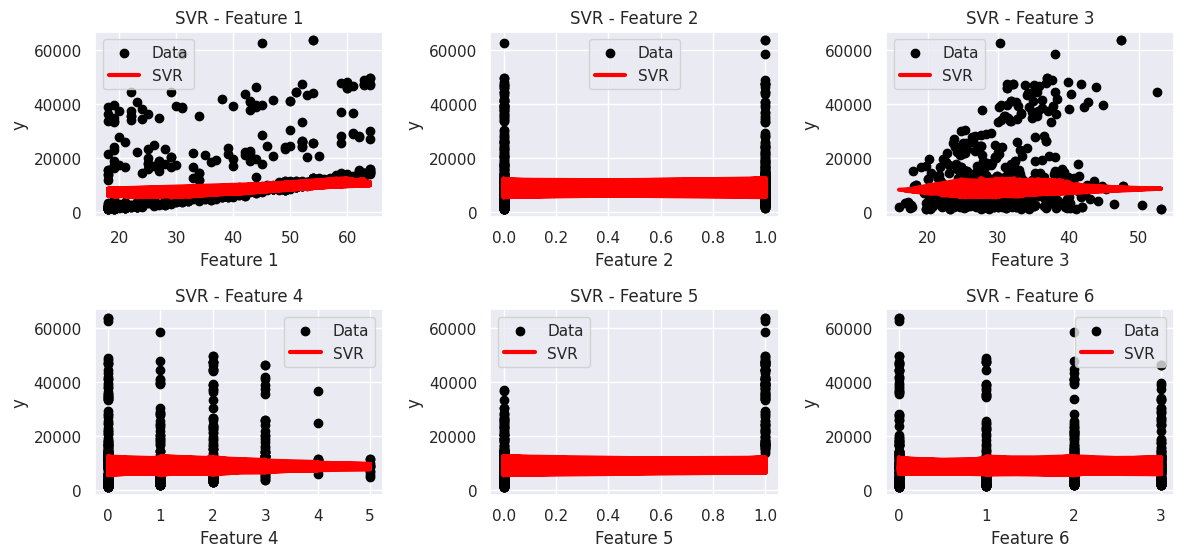

Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.98      0.50      0.66       252
           1       0.70      0.99      0.82       303

    accuracy                           0.77       555
   macro avg       0.84      0.74      0.74       555
weighted avg       0.83      0.77      0.75       555

[[125 127]
 [  3 300]]


In [24]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test, threshold are defined and have appropriate values

# Define and train the SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

# Make predictions
y_pred = svr.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Plot the results for each feature (assuming X_test has multiple features)
num_features = X_test.shape[1]
plt.figure(figsize=(12, 8))
for i in range(num_features):
    plt.subplot(3, 3, i + 1)  # Adjust the subplot layout as needed
    plt.scatter(X_test.iloc[:, i], y_test, color='black', label='Data')
    plt.plot(X_test.iloc[:, i], y_pred, color='red', linewidth=3, label='SVR')
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('y')
    plt.title(f'SVR - Feature {i+1}')
    plt.legend()
plt.tight_layout()
plt.show()

# Calculate pseudo-accuracy
accuracy = np.mean(np.abs(y_pred - y_test) <= threshold)
print(f'Accuracy: {accuracy:.2f}')
threshold = 10000
y_classified = np.where(y_pred <= threshold, 1, 0)
y_test_classified = np.where(y_test <= threshold, 1, 0)

# Print classification report and confusion matrix
print(classification_report(y_test_classified, y_classified))
print(confusion_matrix(y_test_classified, y_classified))


Mean Squared Error: 90357173.01
R-squared (Coefficient of Determination): 0.41


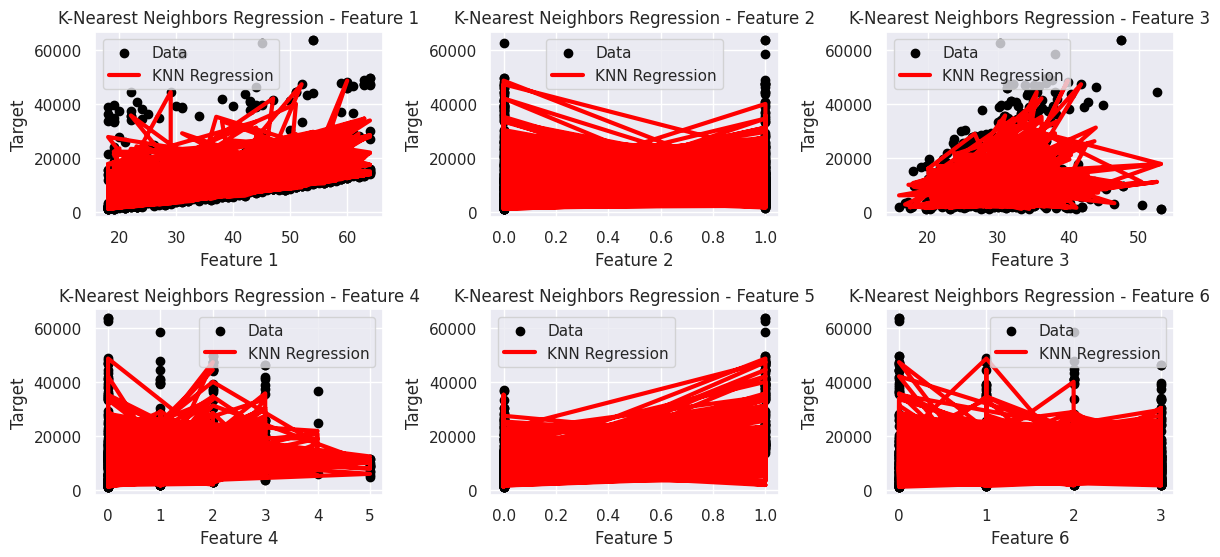

Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.74      0.84      0.78       252
           1       0.85      0.75      0.80       303

    accuracy                           0.79       555
   macro avg       0.79      0.79      0.79       555
weighted avg       0.80      0.79      0.79       555

[[211  41]
 [ 75 228]]


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define and train the KNN regression model
knnr = KNeighborsRegressor(n_neighbors=5)
knnr.fit(X_train, y_train)

# Make predictions
y_pred = knnr.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (Coefficient of Determination): {r2:.2f}")

# Plot the results for each feature
num_features = X_test.shape[1]
plt.figure(figsize=(12, 8))
for i in range(num_features):
    plt.subplot(3, 3, i + 1)  # Adjust the subplot layout as needed
    plt.scatter(X_test.iloc[:, i], y_test, color='black', label='Data')
    plt.plot(X_test.iloc[:, i], y_pred, color='red', linewidth=3, label='KNN Regression')
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Target')
    plt.title(f'K-Nearest Neighbors Regression - Feature {i+1}')
    plt.legend()
plt.tight_layout()
plt.show()
threshold = 10000  # Define a threshold for "accuracy" calculation

# Calculate pseudo-accuracy
accuracy = np.mean(np.abs(y_pred - y_test) <= threshold)
print(f'Accuracy: {accuracy:.2f}')
threshold = 10000
y_classified = np.where(y_pred <= threshold, 1, 0)
y_test_classified = np.where(y_test <= threshold, 1, 0)

# Print classification report and confusion matrix
print(classification_report(y_test_classified, y_classified))
print(confusion_matrix(y_test_classified, y_classified))


Mean Squared Error: 21508969.26
R-squared (Coefficient of Determination): 0.86
Accuracy: 0.92


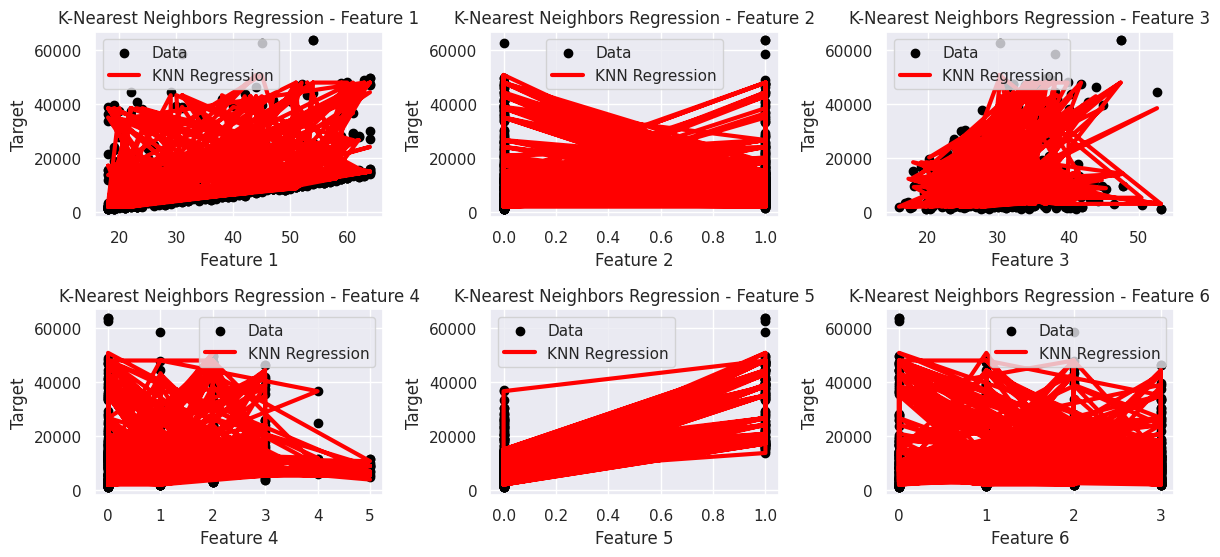

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       252
           1       0.89      0.88      0.88       303

    accuracy                           0.87       555
   macro avg       0.87      0.87      0.87       555
weighted avg       0.87      0.87      0.87       555

[[218  34]
 [ 36 267]]


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define and train the Decision Tree Regression model
dt_regressor = DecisionTreeRegressor(max_depth=5)  # Adjust max_depth as needed
dt_regressor.fit(X_train, y_train)

# Make predictions
y_pred = dt_regressor.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (Coefficient of Determination): {r2:.2f}")

# Calculate accuracy (for demonstration purposes only)
threshold = 10000  # Define a threshold for "accuracy" calculation
accuracy = np.mean(np.abs(y_pred - y_test) <= threshold)
print(f'Accuracy: {accuracy:.2f}')

# Plot the results for each feature
num_features = X_test.shape[1]
plt.figure(figsize=(12, 8))
for i in range(num_features):
    plt.subplot(3, 3, i + 1)  # Adjust the subplot layout as needed
    plt.scatter(X_test.iloc[:, i], y_test, color='black', label='Data')
    plt.plot(X_test.iloc[:, i], y_pred, color='red', linewidth=3, label='KNN Regression')
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Target')
    plt.title(f'K-Nearest Neighbors Regression - Feature {i+1}')
    plt.legend()
plt.tight_layout()
plt.show()
threshold = 10000
y_classified = np.where(y_pred <= threshold, 1, 0)
y_test_classified = np.where(y_test <= threshold, 1, 0)

# Print classification report and confusion matrix
print(classification_report(y_test_classified, y_classified))
print(confusion_matrix(y_test_classified, y_classified))



Mean Squared Error: 21508969.26
R-squared (Coefficient of Determination): 0.86


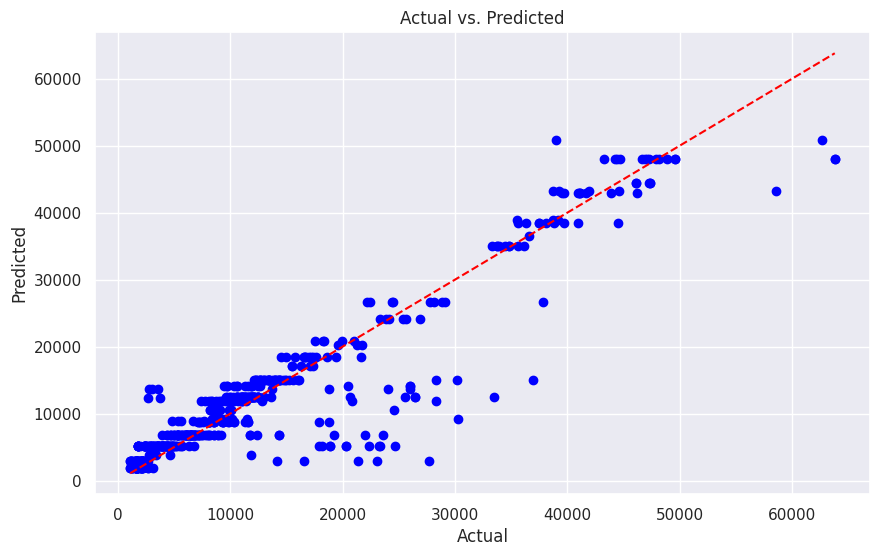

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are already defined

# Define and train the Decision Tree Regression model
dt_regressor = DecisionTreeRegressor(max_depth=5)  # Adjust max_depth as needed
dt_regressor.fit(X_train, y_train)

# Make predictions
y_pred = dt_regressor.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (Coefficient of Determination): {r2:.2f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()


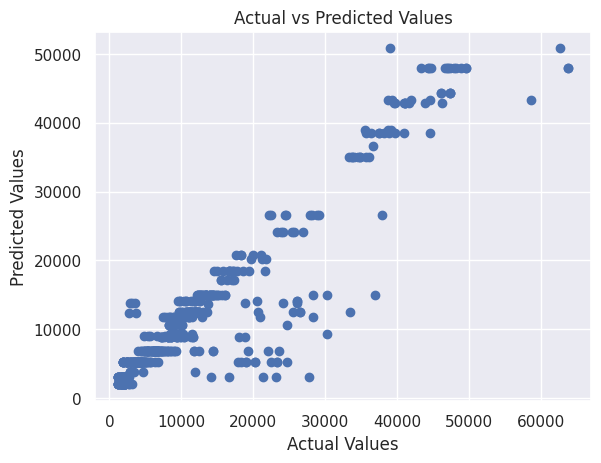

In [18]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming y_test contains the actual insurance categories and y_pred contains predicted values
# Example categories: low, medium, high
y_test_categories = np.where(y_test < 20000, 'Low', np.where(y_test < 40000, 'Medium', 'High'))
y_pred_categories = np.where(y_pred < 20000, 'Low', np.where(y_pred < 40000, 'Medium', 'High'))

# Create confusion matrix
conf_matrix = confusion_matrix(y_test_categories, y_pred_categories, labels=['Low', 'Medium', 'High'])

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[445   5   0]
 [ 29  38   5]
 [  0   2  31]]


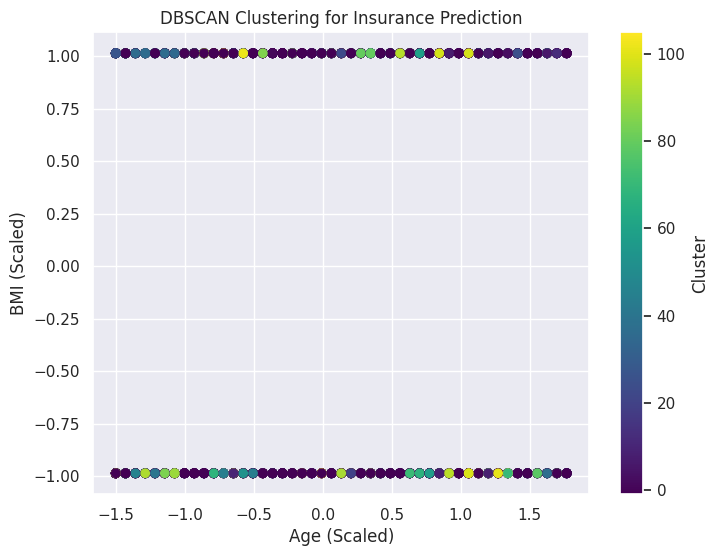

Cluster Labels: [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105]
Cluster Counts: [1808    6   10    6   22   40   12   18   12   24    6   36    8    8
    8    6    6   16    6    6    6    8    6   10   24    6   14    6
   20   20   12    6    6    8   10    8    6   12    8    6    6   14
    8   10    6   10    8    6    8    6    6   12    8    6    6   14
   10    6    6   12    6   10    8    6   10    6   10   10    8    6
    6    8    6   14    8    6    6    6    6   10    8   18    6    6
    6    6    6    6    6    6   12    6    6    6    6    6    6    6
    6    6    6    6    6    6    6 

In [28]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Perform data preprocessing: handle missing values, encode categorical variables, etc.
# For simplicity, let's assume the data is already preprocessed and numeric


# Replace the following line with the correct column names from the data DataFrame
features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
# Standardize the selected features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Initialize DBSCAN with appropriate hyperparameters
eps = 0.3  # Adjust based on your data characteristics
min_samples = 5  # Adjust based on the size of your dataset
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit DBSCAN to the scaled features
clusters = dbscan.fit_predict(scaled_features)

# Visualize the clusters (2D plot for simplicity, assuming only two features)
plt.figure(figsize=(8, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Age (Scaled)')
plt.ylabel('BMI (Scaled)')
plt.title('DBSCAN Clustering for Insurance Prediction')
plt.colorbar(label='Cluster')
plt.show()

# Analyze the clusters and outliers
cluster_labels, cluster_counts = np.unique(clusters, return_counts=True)
print("Cluster Labels:", cluster_labels)
print("Cluster Counts:", cluster_counts)

silhouette = silhouette_score(scaled_features, clusters)
print("Silhouette Score:", silhouette)
threshold = 10000
y_classified = np.where(y_pred <= threshold, 1, 0)
y_test_classified = np.where(y_test <= threshold, 1, 0)

# Print classification report and confusion matrix
print(classification_report(y_test_classified, y_classified))
print(confusion_matrix(y_test_classified, y_classified))


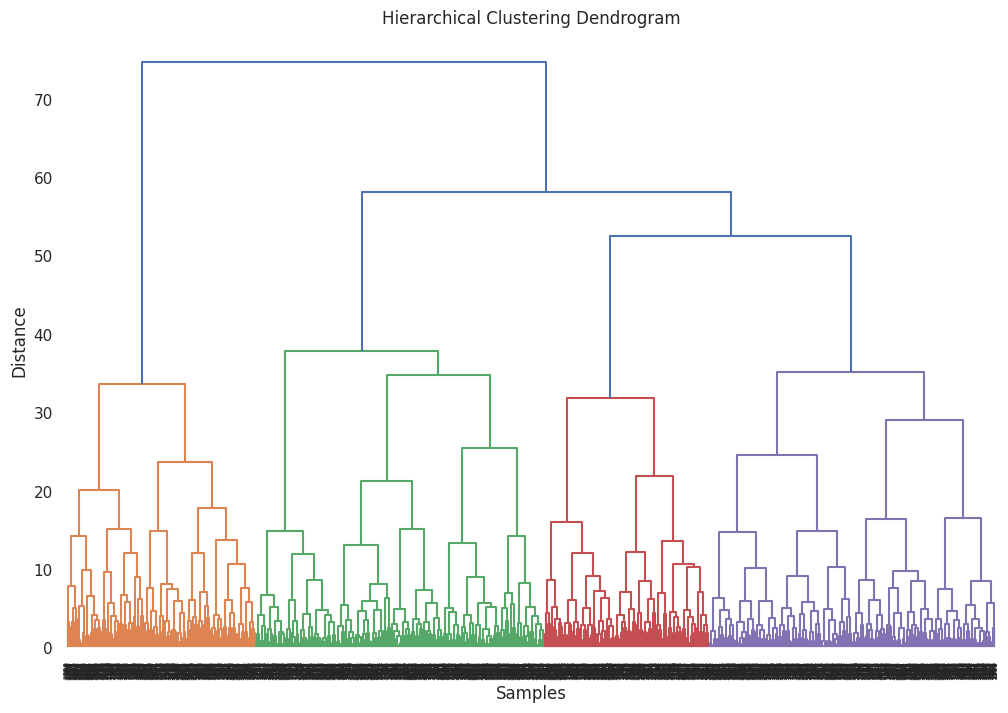

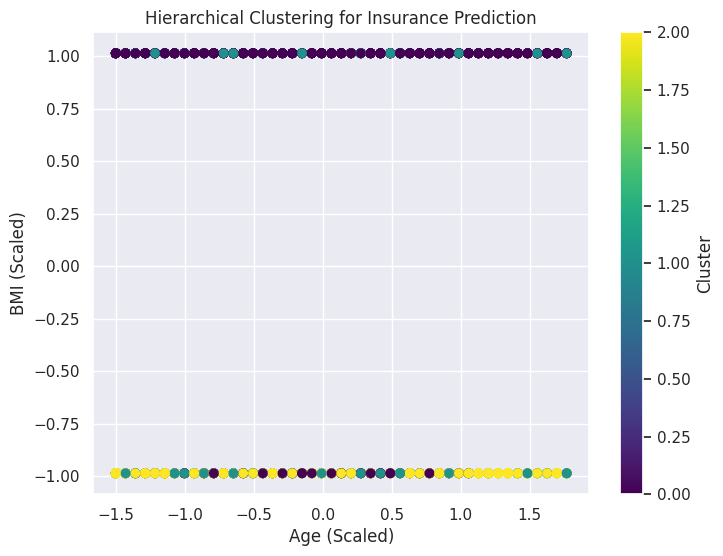

Cluster Labels: [0 1 2]
Cluster Counts: [1346  564  862]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       252
           1       0.89      0.88      0.88       303

    accuracy                           0.87       555
   macro avg       0.87      0.87      0.87       555
weighted avg       0.87      0.87      0.87       555

[[218  34]
 [ 36 267]]


In [29]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Assuming you have a CSV file 'insurance_data.csv' with relevant columns
# Load the data


# Perform data preprocessing: handle missing values, encode categorical variables, etc.
# For simplicity, let's assume the data is already preprocessed and numeric



# Standardize the selected features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Perform hierarchical clustering using Ward's method
linkage_matrix = linkage(scaled_features, method='ward')

# Plot the dendrogram to visualize the clustering hierarchy
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Optional: Determine the optimal number of clusters using the dendrogram
# You can use techniques like the elbow method or visually inspect the dendrogram

# Extract clusters using a chosen number of clusters
num_clusters = 3  # Adjust based on your analysis of the dendrogram
from sklearn.cluster import AgglomerativeClustering

clusterer = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
clusters = clusterer.fit_predict(scaled_features)

# Visualize the clusters (2D plot for simplicity, assuming only two features)
plt.figure(figsize=(8, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Age (Scaled)')
plt.ylabel('BMI (Scaled)')
plt.title('Hierarchical Clustering for Insurance Prediction')
plt.colorbar(label='Cluster')
plt.show()

# Analyze the clusters and their characteristics
cluster_labels, cluster_counts = np.unique(clusters, return_counts=True)
print("Cluster Labels:", cluster_labels)
print("Cluster Counts:", cluster_counts)
threshold = 10000
y_classified = np.where(y_pred <= threshold, 1, 0)
y_test_classified = np.where(y_test <= threshold, 1, 0)

# Print classification report and confusion matrix
print(classification_report(y_test_classified, y_classified))
print(confusion_matrix(y_test_classified, y_classified))


In [23]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are defined and have appropriate values
# Also assuming threshold is defined

# Define and train your SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)  # Example parameters, adjust as needed

# Assuming X_train and y_train are defined somewhere earlier in your code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svr.fit(X_train, y_train)  # Fit the SVR model with training data

# Define a function to predict the target variable based on input features
def predict_target(features):
    # Use the fitted SVR model to predict the target variable
    target_pred = svr.predict([features])  # Note the change here

    return target_pred[0]  # Return the predicted target value

# Example usage:
def get_user_input():
    # Get input features from the user
    age = float(input("Enter age: "))
    bmi = float(input("Enter BMI: "))
    children = int(input("Enter number of children: "))
    smoker = int(input("Enter 1 if smoker, 0 otherwise: "))
    sex = int(input("Enter 1 for male 0 for female: "))
    region = int(input("Enter a number between 1-4 "))

    return [age, bmi, children, smoker,region,sex]

# Get user input
user_input = get_user_input()

# Predict target variable using the user input
predicted_target = predict_target(user_input)
print(f"Predicted Insurance Charges: {predicted_target}")


Enter age: 33
Enter BMI: 22.2
Enter number of children: 3
Enter 1 if smoker, 0 otherwise: 1
Enter 1 for male 0 for female: 1
Enter a number between 1-4 4
Predicted Insurance Charges: 8601.477395789767


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
